In [35]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [36]:
alpaca_api_key = "PKGC1VSZO33ZTWIONX5I"
alpaca_secret_key = "Vy8sEvLiXCaCjfziEZR5rX2vivmcNENJNB1rw2qU"
alpaca_end_point = "https://paper-api.alpaca.markets"



api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    

In [37]:
ticker = ["SPY"]
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [38]:
sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

[                              open    high     low     close     volume  \
 timestamp                                                                 
 2016-01-04 05:00:00+00:00  200.490  201.03  198.59  201.0192  222353534   
 2016-01-05 05:00:00+00:00  201.405  201.90  200.05  201.3600  110845729   
 2016-01-06 05:00:00+00:00  198.330  200.06  197.60  198.8200  152112604   
 2016-01-07 05:00:00+00:00  195.330  197.44  193.59  194.0500  213436023   
 2016-01-08 05:00:00+00:00  195.190  195.85  191.58  191.9230  209567228   
 ...                            ...     ...     ...       ...        ...   
 2022-12-23 05:00:00+00:00  379.650  383.06  378.03  382.9100   58757557   
 2022-12-27 05:00:00+00:00  382.790  383.15  379.65  381.4000   51494435   
 2022-12-28 05:00:00+00:00  381.330  383.39  376.42  376.6600   70660057   
 2022-12-29 05:00:00+00:00  379.630  384.35  379.08  383.4400   64517045   
 2022-12-30 05:00:00+00:00  380.640  382.58  378.43  382.4300   83474793   
 
          

<Axes: xlabel='timestamp'>

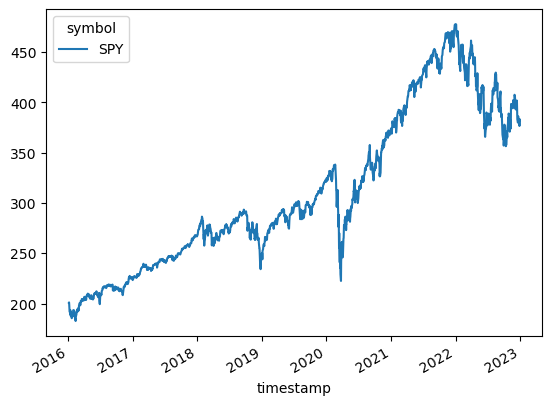

In [39]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': 'Simulated Cumulative Return Behavior of SPY Stock Over the past Seven Years'}, xlabel='timestamp'>

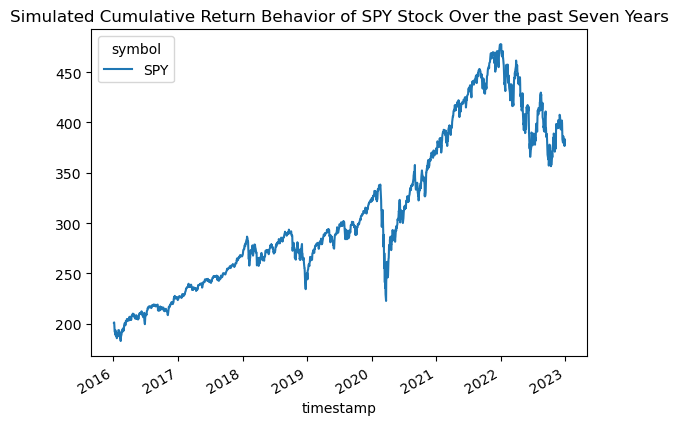

In [42]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Stock Over the past Seven Years")

In [43]:
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()


ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [44]:
sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

[                             open      high       low   close    volume  \
 timestamp                                                                 
 2016-01-04 05:00:00+00:00   42.06   42.2800   41.6100   42.27  21638628   
 2016-01-05 05:00:00+00:00   42.40   42.5000   41.9700   42.16  16067215   
 2016-01-06 05:00:00+00:00   41.54   41.9150   41.3850   41.64  13858365   
 2016-01-07 05:00:00+00:00   40.79   41.3162   40.3900   40.41  16840659   
 2016-01-08 05:00:00+00:00   40.76   40.8950   40.0400   40.09  19233104   
 ...                           ...       ...       ...     ...       ...   
 2022-12-23 05:00:00+00:00  123.58  124.7200  122.6676  124.60   4106667   
 2022-12-27 05:00:00+00:00  124.17  124.3900  122.6900  123.42   4725698   
 2022-12-28 05:00:00+00:00  123.12  124.2700  121.2900  121.43   5001624   
 2022-12-29 05:00:00+00:00  122.62  125.0300  122.6050  124.61   5436443   
 2022-12-30 05:00:00+00:00  123.32  124.5100  122.5500  124.44   4140015   
 
          

<Axes: xlabel='timestamp'>

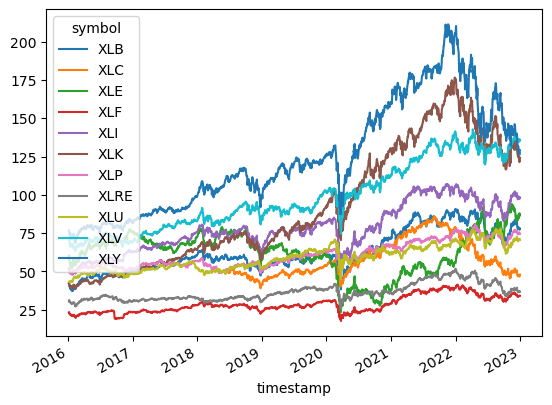

In [45]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': 'Simulated Cumulative Return Behavior of SPY Sectors Stock Over the past Seven Years'}, xlabel='timestamp'>

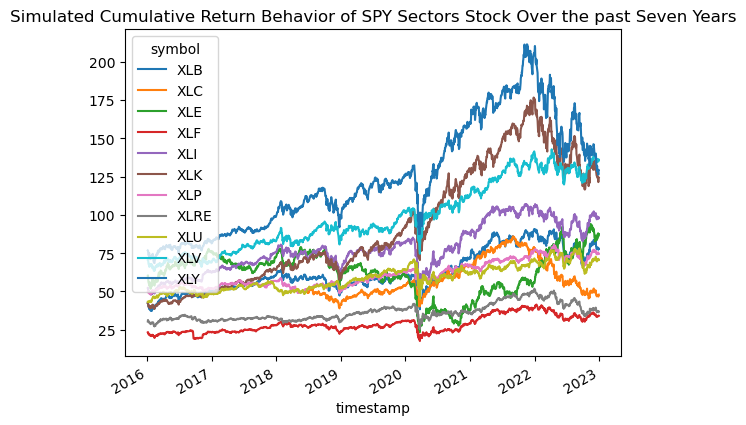

In [49]:
df_return.plot(title= "Simulated Cumulative Return Behavior of SPY Sectors Stock Over the past Seven Years")

In [50]:
ticker = ["SPY"]

timeframe = "1Day"

start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2017-01-20", tz="America/New_York").isoformat()

ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

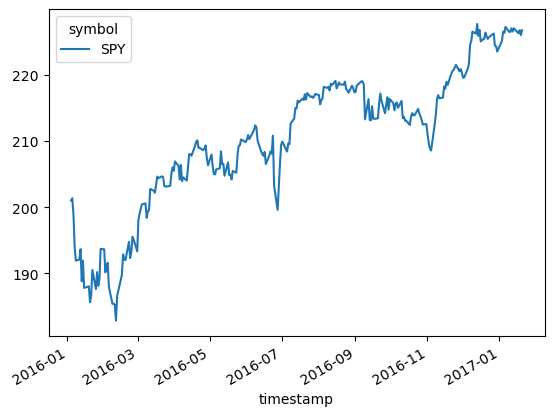

In [51]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': "Simulated Cumulative Return Behavior of SPY Stock Obama's Final Year"}, xlabel='timestamp'>

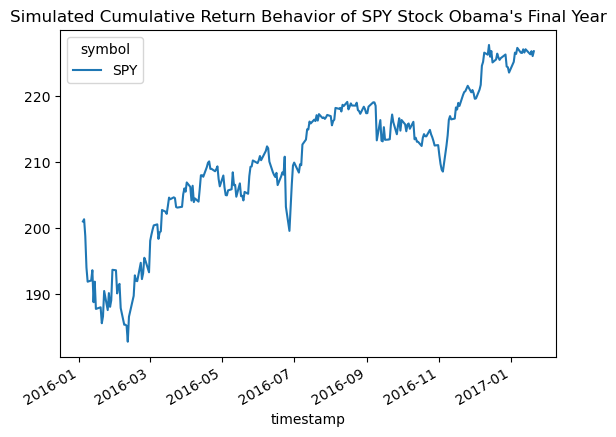

In [54]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Stock Obama's Final Year")

In [55]:
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"

start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2017-01-20", tz="America/New_York").isoformat()

ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

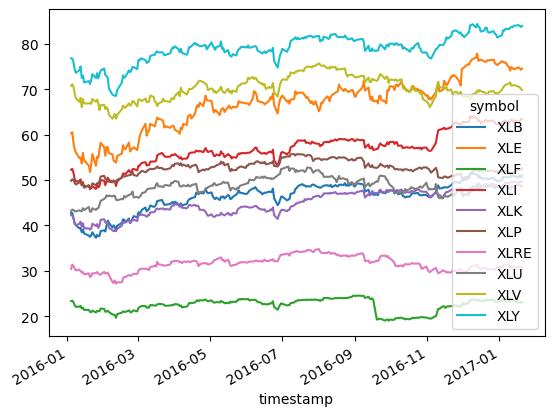

In [56]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': "Simulated Cumulative Return Behavior of SPY Sectors Obama's Final Year"}, xlabel='timestamp'>

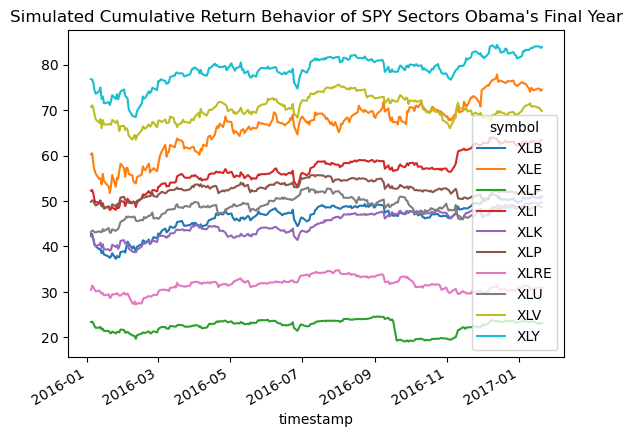

In [57]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Sectors Obama's Final Year")

In [58]:
ticker = ["SPY"]

timeframe = "1Day"


start_date = pd.Timestamp("2017-01-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()

ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

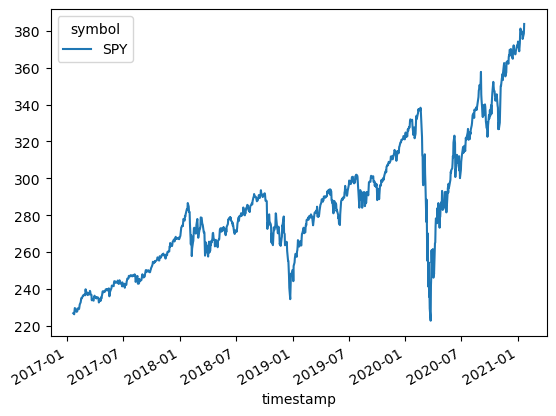

In [59]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': 'Simulated Cumulative Return Behavior of SPY Stock Trumps Term'}, xlabel='timestamp'>

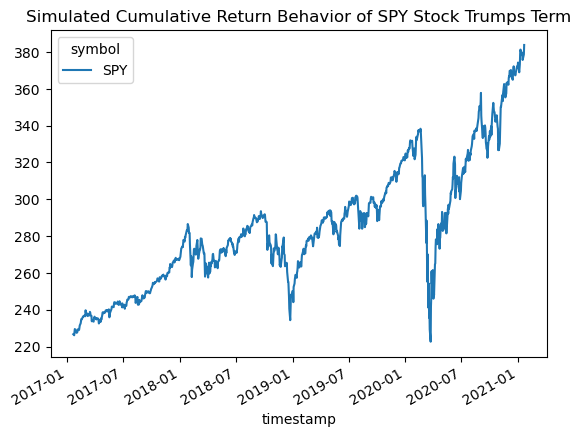

In [60]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Stock Trumps Term")

In [61]:
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date = pd.Timestamp("2017-01-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()


ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

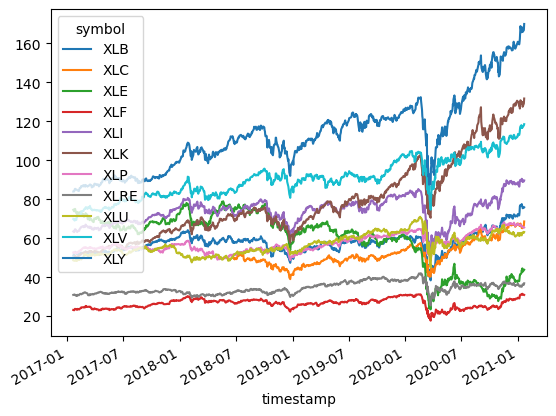

In [62]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': 'Simulated Cumulative Return Behavior of SPY Sectors Trumps Term'}, xlabel='timestamp'>

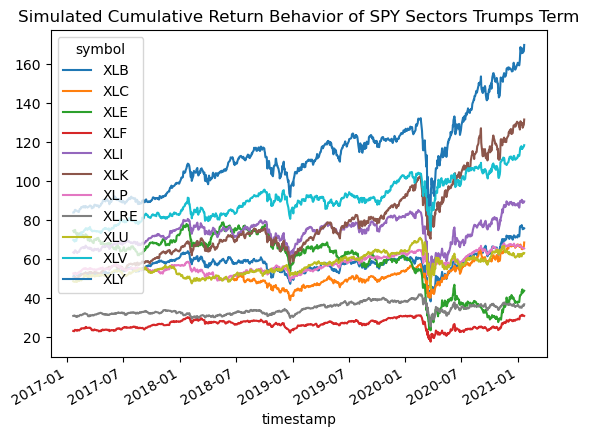

In [64]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Sectors Trumps Term")

In [65]:
ticker = ["SPY"]

timeframe = "1Day"


start_date = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()

ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

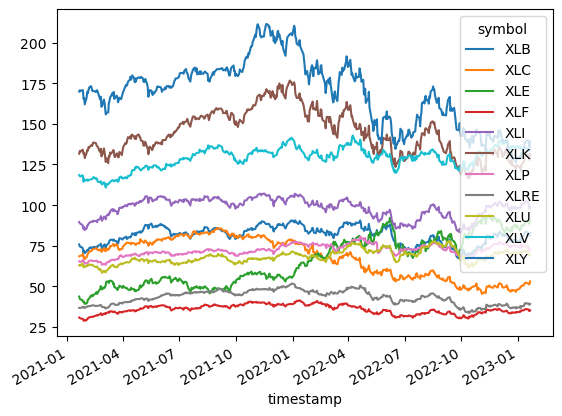

In [74]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': "Simulated Cumulative Return Behavior of SPY Stock Biden's Term"}, xlabel='timestamp'>

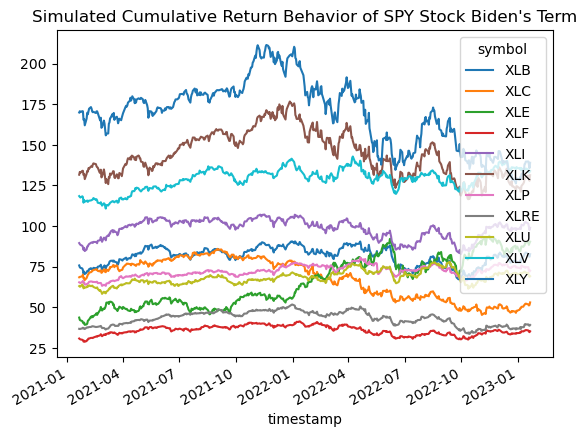

In [75]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Stock Biden's Term")

In [76]:
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()


ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

<Axes: xlabel='timestamp'>

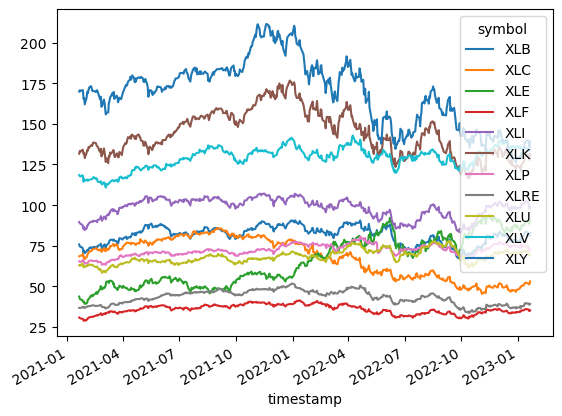

In [77]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

<Axes: title={'center': "Simulated Cumulative Return Behavior of SPY Sectors Biden's Term"}, xlabel='timestamp'>

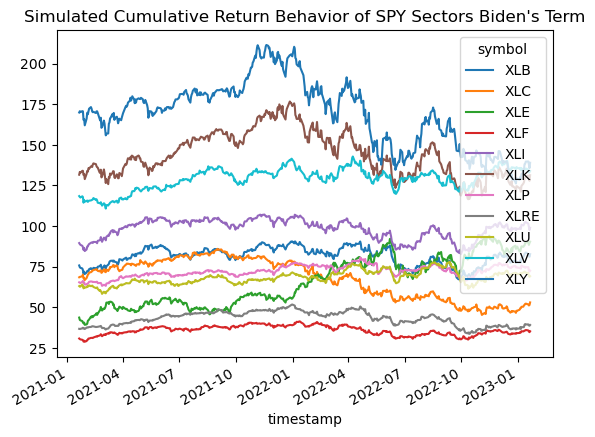

In [78]:
df_return.plot(title="Simulated Cumulative Return Behavior of SPY Sectors Biden's Term")

In [79]:
#The XLB (Materials Select) Sector has been performing best through the past 3 presidential cycles. 